$$\LARGE{\text{Computational Methods (PH49012),Spring-2022, IIT KGP}}$$<br>$$\large{\text{Bapi Basak}}$$<br>$$\large{\text{Roll:21PH40016}}$$

# Imports


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt,font_manager as fm
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
from numpy import arange
from numpy.linalg import norm

C:\Users\bapib\AppData\Local\Temp/ipykernel_7384/1909060657.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


# Q1).Fibonacci series
# Fn = Fn−1 +Fn−2.


In [3]:
n=int(input("Enter the nth term\n"))

def fibonacci(n):

    # first two terms
    n1, n2 = 0, 1
    count = 2
    nth=1
    # if there is only one term, return n1
    if n == 1:
       nth=0
    # generate fibonacci sequence
    else:
       while count < n:
           nth = n1 + n2
           # update values
           n1 = n2
           n2 = nth
           count += 1
    return nth
print("{}th term of Fibonacci sequence:".format(n))
print(fibonacci(n))
print("F{}/F{}".format(n,n-1))
print(fibonacci(n)/fibonacci(n-1))
nlist=np.arange(1,51,1)
Flist=[]
for i in nlist:
    Flist.append(fibonacci(i+2)/fibonacci(i+1))
fig=plt.figure(figsize=(10,5))
plt.plot(nlist,Flist)
plt.ylabel(r'$\frac{F_{n}}{F_{n-1}}$',size='20')
plt.xlabel('n',size='20')

# Q2).Solve using Gauss Jordan Method:
$$2x_{2}+x_{4}=0$$
$$2x_{1}+2x_{2}+3x_{3}+2x_{4}+2=0$$
$$4x_{1}-3x_{2}+x_{4}+7=0$$
$$6x_{1}+x_{2}-6x_{3}-5x_{4}-6=0$$

In [ ]:
def Gauss_Jordan(A, B):
    A = np.array(A, dtype=float)
    B = np.array(B, dtype=float)

    n = B.shape[0]

    for k in range(n):
        if np.fabs(A[k, k]) < 10**(-12):
            for i in range(k + 1, n):
                if np.fabs(A[i, k]) > np.fabs(A[k, k]):
                    temp = np.copy(A[i, :])
                    A[i, :] = A[k, :]
                    A[k, :] = temp

                    temp = B[i]
                    B[i] = B[k]
                    B[k] = temp
        # Division of the pivot
        pivot = A[k, k]
        A[k, :] = A[k, :] / pivot
        B[k] = B[k] / pivot

        # elimination loop
        for i in range(n):
            if i == k:
                continue
            factor = A[i, k]
            A[i, :] = A[i, :] - factor * A[k, :]
            B[i] = B[i] - factor * B[k]

    return B, A

In [ ]:
A = [[0, 2, 0, 1], [2, 2, 3, 2],  [4, -3, 0, 1], [6, 1, -6, -5]]   #Input Matrix
B = [0, -2, -7, 6]

print("Input A = ")
print(np.array(A, dtype=float))
print()
print("Input B = ")
print(np.array(B, dtype=float))
print()

Input A = 
[[ 0.  2.  0.  1.]
 [ 2.  2.  3.  2.]
 [ 4. -3.  0.  1.]
 [ 6.  1. -6. -5.]]

Input B = 
[ 0. -2. -7.  6.]



In [ ]:
new_B, new_A = Gauss_Jordan(A, B)
print("Solution: ")
for i in range(len(new_B)):
    print('\tx_%d = %.2f\n'%(i,new_B[i]))     #Writing Solutions

Solution: 
	x_0 = -0.50

	x_1 = 1.00

	x_2 = 0.33

	x_3 = -2.00



# Q3). make a plot of the Galilean spiral $r = \theta^{2}$ for $0\le\theta\le10\pi$

Text(0, 0.5, 'y')

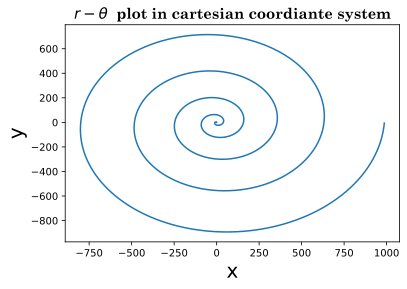

In [ ]:
theta=np.arange(0,10*np.pi,0.01)
r=[]
for i in theta:
    r.append(i**2)
x=[]
y=[]                                  #Making Empty list for cartesian coordinate values
for j in range(len(r)):
    x.append(r[j]*np.cos(theta[j]))   #converting from polar to cartesian coordinate
    y.append(r[j]*np.sin(theta[j]))   
plt.title(r'$r-\theta$  plot in cartesian coordiante system',fontweight='bold',fontname='Century Schoolbook',size='15')
plt.plot(x,y)
plt.xlabel('x',size='20')
plt.ylabel('y',size='20')


# Q4).Take two n × n matrices A and B, whose elements have been defined as follows:
$$A_{ij}=(i + 1) × (j + 1)$$
$$B_{ij} = (i + j)$$
# Taking n as input, write a code to multiply two such matrices A and B.

In [ ]:
n=int(input("Enter the order of Matrix\n"))    #order of matrix as user input
A=[[0.0 for i in range(n)] for j in range(n)]
B=[[0.0 for i in range(n)] for j in range(n)]   #making shape of matrix with zero entries
for i in range(n):
    for j in range(n):
        A[i][j]=(i+1)*(j+1)
for i in range(n):
    for j in range(n):                         #Filling entries with defined function
        B[i][j]=(i+j)
AB=[[0.0 for i in range(n)] for j in range(n)]
for i in range(n):
    for j in range(n):
        for k in range(n):
            AB[i][j]=AB[i][j]+A[i][k]*B[k][j]   #Multiplication
arr=np.array(AB)            
print('Result(A*B):\n',arr)
      

Enter the order of Matrix
4
Result(A*B):
 [[ 20.  30.  40.  50.]
 [ 40.  60.  80. 100.]
 [ 60.  90. 120. 150.]
 [ 80. 120. 160. 200.]]


# Q5).Write a code to solve the system of equations using QR decomposition:
\begin{equation}
\begin{bmatrix}
2 & 1 & 4 & 1 \\ 3 & 4 & -1 & -1\\ 1 & -4 & 1 & 5 \\ 2 & -2 & 1 & 3 
\end{bmatrix}
%
\begin{bmatrix}
x_{1} \\ x_{2} \\ x_{3} \\ x_{4}
\end{bmatrix}
=
\begin{bmatrix}
-4 \\ 3 \\ 9 \\ 7
\end{bmatrix}
\end{equation}

In [ ]:
def QR_Demposition(A):           #Function for decomposing input matrix into Q and R
    A = np.array(A, dtype=float)
    U = np.copy(A)
    m, n = A.shape

    temp_norm = norm(U[:, 0])
    U[:, 0] = U[:, 0] / temp_norm
    for j in range(1, n):
        for i in range(j):
            U[:, j] = U[:, j] - proj_x_onto_y(A[:, j], U[:, i]).reshape((1, -1))
        U[:, j] = U[:, j] / norm(U[:, j])
    Q = np.copy(U)
    R = np.matmul(np.transpose(Q), A)
    return Q, R


def proj_x_onto_y(x, y):      
    """Gives projection of x onto y"""
    x = np.copy(x)
    y = np.copy(y)

    x = x.reshape(-1)
    y = y.reshape(-1)
    ans = np.sum(x * y)
    ans = ans / (norm(y)**2)
    ans = ans * y

    return ans


In [ ]:
def matTrans(A):      #Function for matrix transpose
    return [[A[j][i] for j in range(len(A))] for i in range(len(A[0]))]   

def matMul(A,B):      #Function for matrix Multiplication
    cl=len(A[0])
    rw=len(B)
    ABrw=len(A)
    ABcl=len(B[0])
    AB=[[0.0 for i in range(ABcl)] for j in range(ABrw)]
    for i in range(ABrw):
        for j in range(ABcl):
            for k in range(rw):
                AB[i][j]=AB[i][j]+A[i][k]*B[k][j]
    return AB

    

In [ ]:
A=[[2,1,4,1],[3,4,-1,-1],[1,-4,1,5],[2,-2,1,3]]   #Input Matrix
B=[[-4],[3],[9],[7]]

In [ ]:
Q1,R1=QR_Demposition(A)   #Taking Output Q and R matrix after decomposition

Q1T=matTrans(Q1)          #Taking Transpose of Q matrix

QTB=matMul(Q1T,B)         #Multiplying transpose of Q with B matrix

n=len(A)                  #Back substitution
X=[0.0 for i in range(n)]
X[n-1]=QTB[n-1]/R1[n-1][n-1]
for i in range(n-2,-1,-1):
    sm=0.0
    for j in range(i+1,n):
        sm+=R1[i][j]*X[j]
    X[i]=(1.0/R1[i][i])*(QTB[i]-sm)
print('Solution:')
for i in range(len(X)):
    print('\tx_%d = %.2f\n'%(i,X[i]))


Solution:
	x_0 = 2.00

	x_1 = -1.00

	x_2 = -2.00

	x_3 = 1.00



# Q6).Consider a potential:
$$U(x,y)=\dfrac{1}{2}(x^{2}+y^{2})$$
# Compute its gradient and plot it on the contours of the potential. Show five such contours.

Text(0, 0.5, 'y')

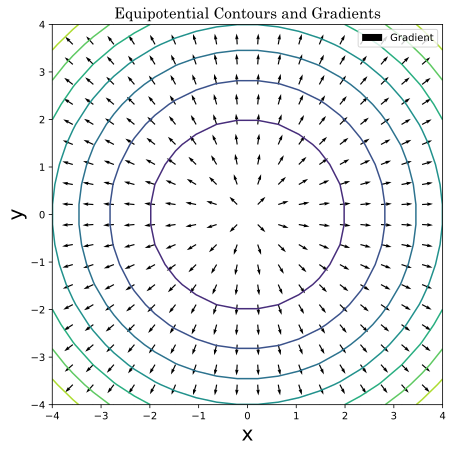

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
domain=[-4,4]
N=20
h=(domain[1]-domain[0])/(N-1)
def f(x,y):                        #Defining potential function
    return ((x**2)+(y**2))/2
x, y = np.meshgrid(np.linspace(domain[0],domain[1],N),np.linspace(domain[0],domain[1],N))   #Discretizing Domain

delx=(f(x+h,y)-f(x-h,y))/(2*h)
dely=(f(x,y+h)-f(x,y-h))/(2*h)     #partial differentiation

u = delx/np.sqrt(delx**2 + dely**2)
v = dely/np.sqrt(delx**2 + dely**2)         #Unit vectors along the direction of gradient

z=((x**2)+(y**2))/2                #Contour equation

fig=plt.figure(figsize=(7,7))
plt.quiver(x,y,u,v,label='Gradient')
plt.contour(x, y,z,8)
plt.title('Equipotential Contours and Gradients',fontname='Century Schoolbook',size='15')
plt.legend(loc='upper right')
plt.xlabel('x',size='20')
plt.ylabel('y',size='20')

# Q7).Find the First three bound state energies of finite square well potential by solving the equation:
$$\tan(za)=2\dfrac{\sqrt{(\dfrac{z_0}{z})^{2}-1}}{[2-(\dfrac{z_0}{z})^{2}]}$$
For $a=1.0,z_{0}=\sqrt{\frac{2m}{V_{0}\hbar}}=10.0$ and $z^{2}=z_{0}^{2}+\frac{2mE}{\hbar^{2}}$
obtain the allowed values of the energy E, in the unit of $\frac{\hbar^{2}}{2m}$

In [ ]:
a=1
z0=10
z=np.arange(-0.3,3.2*np.pi,0.001)  #discretizing domain for tan(za) plot

z1=np.arange(-0.3,7.01,0.001)       #discretizing domain for RHS plot
z2=np.arange(7.08,3.2*np.pi,0.001)  #discretizing in parts as the function is discontinuous

y1=np.tan(z*a)                       #tan(za)

y1[:-1][np.diff(y1) < 0] = np.nan   #to get rid of line joining the assymptotic limit 

def RHS(z):                          #RHS equation
    x = (z0 / z)
    x1 = np.sqrt((x ** 2) - 1)
    x2 = (2 - (x ** 2))
    y2 = 2 * (x1 / x2)
    return y2

fig=plt.figure(figsize=(9,7))         #plots
plt.plot(z,y1,label=r'$\tan(za)$')
plt.plot(z1,RHS(z1),c='r',label=r'$2\dfrac{\sqrt{(\dfrac{z_0}{z})^{2}-1}}{[2-(\dfrac{z_0}{z})^{2}]}$')
plt.plot(z2,RHS(z2),c='r')
plt.ylim(-10,10)
plt.xlabel('z',size='15')
plt.legend(loc='upper right')
plt.grid()


NameError: name 'np' is not defined

In [ ]:
a=1
z0=10
z=np.arange(0.001,4*np.pi,0.01)

def fnc(z):                           #The function whose root to be determined
    x=(z0/z)
    x1=np.sqrt((x**2)-1)
    x2=(2-(x**2))
    y2=2*(x1/x2)
    return np.tan(z*a)-y2

def bisection(f,a,b,N):                #Bisection method
    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Bisection method fails.")
            return None
    return (a_n + b_n)/2

In [ ]:
approx_z1 = bisection(fnc,2.3,2.7,25)     #Finding Roots
print("1st Root:",approx_z1)
approx_z2 = bisection(fnc,5,6,25)
print("2nd Root:",approx_z2)
approx_z3 = bisection(fnc,8,10,25)
print("3rd Root:",approx_z3)

1st Root: 2.6128800213336945
2nd Root: 5.19147814810276
3rd Root: 9.812590330839157


In [ ]:
def Allowed_Energy(z):                   #Findinf Allowed Energies
    return (z**2)-(z0**2)
zlist=[approx_z1,approx_z2,approx_z3]
Allowed_Energies=[]
for i in zlist:
    Allowed_Energies.append(Allowed_Energy(i))
print("Allowed Energies in the unit of (hbar^2)/2m are:\n")
for i in range(len(Allowed_Energies)):
    print('\tE_%d = %.2f\n'%(i,Allowed_Energies[i]))

Allowed Energies in the unit of (hbar^2)/2m are:

	E_0 = -93.17

	E_1 = -73.05

	E_2 = -3.71

